### **Z-score method**

In this method, z-score is calculated. Z-score can be calculated as $x_i=\frac{x-\mu}{\sigma}$.\
The data is assumed to be normally distributed. For the noramal distribution the data that are outside the range of $\pm\sigma$ are considered outliers since the range contains 99% of the data. When the z-score is calculated for a data, the data now will have the mean of zero, which means now the range of the 99% of the data will be $\pm 3$. Thus the z-zcore is calculated during preprocessing. 

![image](images.png)

**Outlier Treatment**
* Trimming
* Capping

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
data=pd.read_csv('C:/Users/Acer/OneDrive/Documents/MACLEARNING/machinelearning/data/advertising.csv')

In [23]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


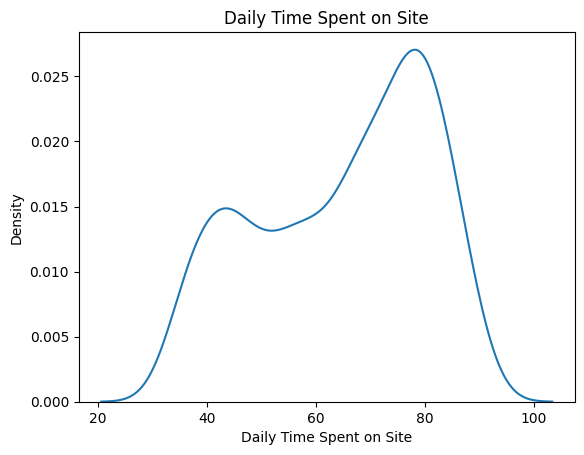

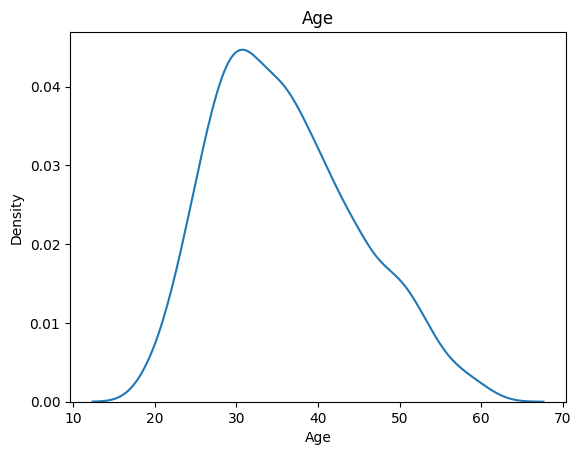

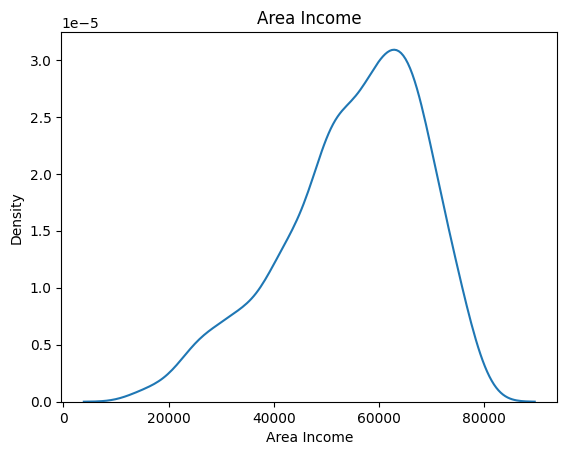

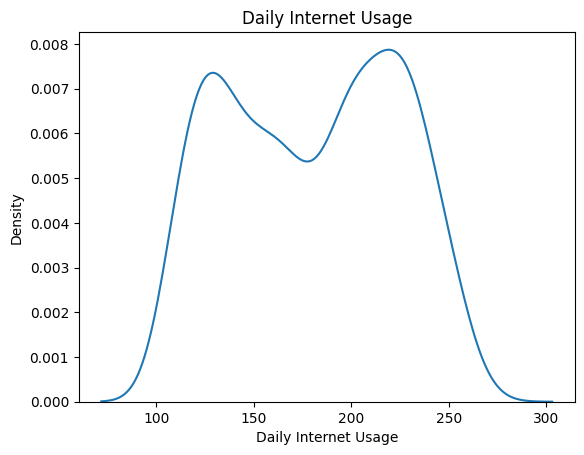

In [25]:
data=data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Clicked on Ad']]
def distribution(col_name):
    sns.kdeplot(data,x=col_name)
    plt.title(f'{col_name}')
    plt.show()
cols_name=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
for col_name in cols_name:
    distribution(col_name)

In [26]:
# here the age and the daily internet usage are only normally distributed so we can apply the z-score method to these columns only
for col in ['Age','Daily Internet Usage']:
    print(f'Mean of {col}:',data[col].mean())
    print(f'Std of {col}:',data[col].std())
    print(f'Min  of {col}:',data[col].min())
    print(f'Max of {col}:',data[col].max())

Mean of Age: 36.009
Std of Age: 8.78556231012592
Min  of Age: 19
Max of Age: 61
Mean of Daily Internet Usage: 180.0001
Std of Daily Internet Usage: 43.9023393019801
Min  of Daily Internet Usage: 104.78
Max of Daily Internet Usage: 269.96


In [27]:
for col in ['Age','Daily Internet Usage']:
    print(f'Higher range of {col}',data[col].mean()+3*data[col].std())
    print(f'Lower range of {col}',data[col].mean()-3*data[col].std())

Higher range of Age 62.36568693037776
Lower range of Age 9.652313069622238
Higher range of Daily Internet Usage 311.7071179059403
Lower range of Daily Internet Usage 48.29308209405971


In [28]:

print('for age')
print(data[(data['Age']>62.36) | (data['Age']<9.65)])
print(len(data[(data['Age']>62.36) | (data['Age']<9.65)]))
print('for daily internet usage')
print(data[(data['Daily Internet Usage']>311.7) | (data['Daily Internet Usage']<48.29)])
print(len(data[(data['Daily Internet Usage']>311.7) | (data['Daily Internet Usage']<48.29)]))

for age
Empty DataFrame
Columns: [Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Clicked on Ad]
Index: []
0
for daily internet usage
Empty DataFrame
Columns: [Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Clicked on Ad]
Index: []
0


We see that there are not outliers in the columns.